In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory= 'C://Users//Prathyushaa//Desktop//Project//traintest//val', target_size=(224,224))

Found 231 images belonging to 7 classes.


In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory= 'C://Users//Prathyushaa//Desktop//Project//traintest//train', target_size=(224,224))

Found 528 images belonging to 7 classes.


In [5]:
#data_dir = "C:/Users/Prathyushaa/Desktop/Project/data/data"

In [6]:
'''img_height, img_width = 224,224
batch_size = 8
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=11,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size)'''

'img_height, img_width = 224,224\nbatch_size = 8\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    data_dir,\n    validation_split=0.2,\n    subset="training",\n    seed=11,\n    label_mode=\'categorical\',\n    image_size=(img_height,img_width),\n    batch_size=batch_size)'

In [7]:
'''val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=11,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size= batch_size)'''

'val_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    data_dir,\n    validation_split=0.2,\n    subset="validation",\n    seed=11,\n    label_mode="categorical",\n    image_size=(img_height,img_width),\n    batch_size= batch_size)'

In [8]:
#class_names= train_ds.class_names
#print(class_names)

In [13]:
inception_model= Sequential()

pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                    input_shape=(224,224,3),
                                                 pooling='max',classes=7,
                                                 weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
    
inception_model.add(pretrained_model)
inception_model.add(Flatten())
inception_model.add(Dense(1024,activation='relu'))
inception_model.add(Dense(256, activation='relu'))
inception_model.add(Dense(7,activation='softmax'))

In [14]:
inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1799      
Total params: 24,165,159
Trainable params: 2,362,375
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
epochs=10
history = inception_model.fit(
    traindata,
    validation_data = testdata,
    epochs=epochs)

Epoch 1/10
17/17 [==============================] - 37s 2s/step - loss: 0.7791 - accuracy: 0.8106 - val_loss: 2.6183 - val_accuracy: 0.6320
Epoch 2/10
17/17 [==============================] - 40s 2s/step - loss: 1.1765 - accuracy: 0.7443 - val_loss: 2.0199 - val_accuracy: 0.6797
Epoch 3/10
17/17 [==============================] - 41s 2s/step - loss: 2.0676 - accuracy: 0.6610 - val_loss: 6.2072 - val_accuracy: 0.4589
Epoch 4/10
17/17 [==============================] - 44s 3s/step - loss: 1.5144 - accuracy: 0.7576 - val_loss: 2.1843 - val_accuracy: 0.6450
Epoch 5/10
17/17 [==============================] - 43s 3s/step - loss: 0.7131 - accuracy: 0.8239 - val_loss: 1.6968 - val_accuracy: 0.7446
Epoch 6/10
17/17 [==============================] - 45s 3s/step - loss: 0.2757 - accuracy: 0.9167 - val_loss: 1.6604 - val_accuracy: 0.7359
Epoch 7/10
17/17 [==============================] - 46s 3s/step - loss: 0.2705 - accuracy: 0.9261 - val_loss: 1.2726 - val_accuracy: 0.7619
Epoch 8/10
17/17 [==

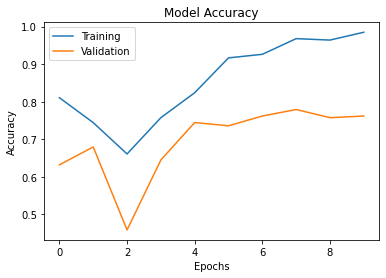

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training","Validation"])
plt.show()

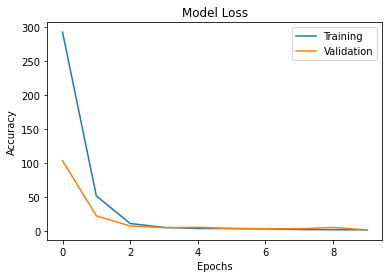

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Training", "Validation"])

In [65]:
inception_model.save('C:/Users/Prathyushaa/Desktop/InceptionV3.h5')

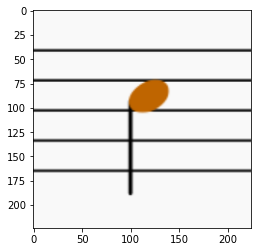

In [66]:
import cv2
IMG_SIZE=224
CATEGORIES = ["Dha-2","Ni-2","Sa","Re-2","Ga-2","Ma-1","Pa"]
def prepare(filepath):
    img = cv2.imread(filepath)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE),3)
    plt.imshow(new_img)
    plt.show()
    return new_img.reshape(-1,IMG_SIZE,IMG_SIZE,3)

model= tf.keras.models.load_model("C:/Users/Prathyushaa/Desktop/InceptionV3.h5")  
prediction=model.predict([prepare('C:/Users/Prathyushaa/Desktop/c4.jpeg')])

In [67]:
print(CATEGORIES[np.argmax(prediction)])

Sa
